In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 读取左右图像
img_left = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

# 设置SGBM参数
min_disparity = 0
num_disparities = 16 * 4  # 必须是16的倍数
block_size = 3

# 创建立体匹配器对象
stereo = cv2.StereoSGBM_create(minDisparity=min_disparity,
                               numDisparities=num_disparities,
                               blockSize=block_size,
                               P1=8 * 3 * block_size ** 2,
                               P2=32 * 3 * block_size ** 2,
                               disp12MaxDiff=1,
                               uniquenessRatio=15,
                               speckleWindowSize=100,
                               speckleRange=32)

# 计算视差图
disparity = stereo.compute(img_left, img_right).astype(np.float32) / 16.0

# 计算视差图的局部平滑度
sobelx = cv2.Sobel(disparity, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(disparity, cv2.CV_64F, 0, 1, ksize=5)
smoothness_map = np.sqrt(sobelx**2 + sobely**2)

# 归一化平滑度图以便于显示
smoothness_normalized = cv2.normalize(smoothness_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
smoothness_normalized = np.uint8(smoothness_normalized)

# 归一化视差图以便于显示
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)



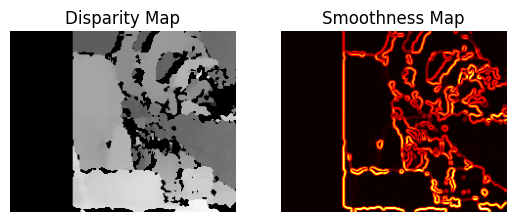

In [8]:
# 可视化视差图和平滑度图
plt.subplot(1, 2, 1)
plt.imshow(disparity_normalized, cmap='gray')
plt.title('Disparity Map')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothness_normalized, cmap='hot')
plt.title('Smoothness Map')
plt.axis('off')

plt.show()